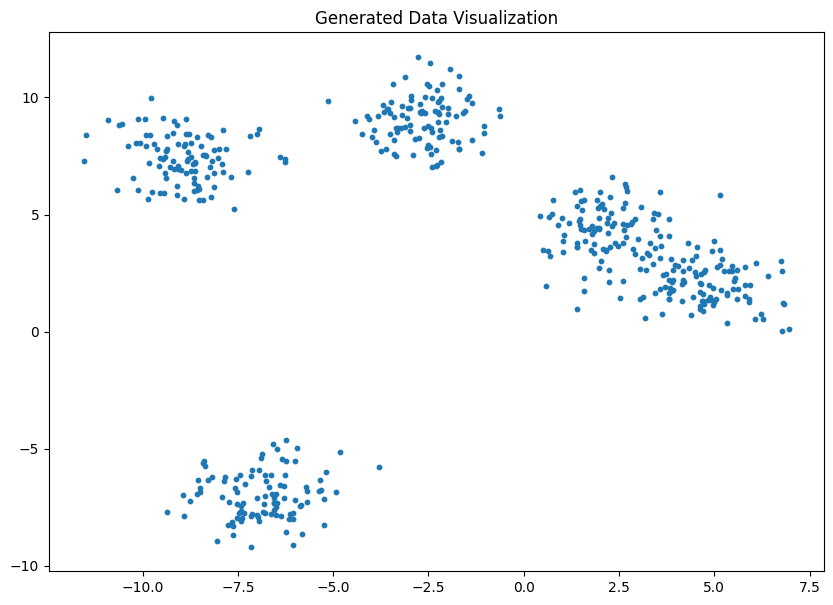

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data with make_blobs
X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

# Visualize the generated data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Generated Data Visualization")
plt.show()



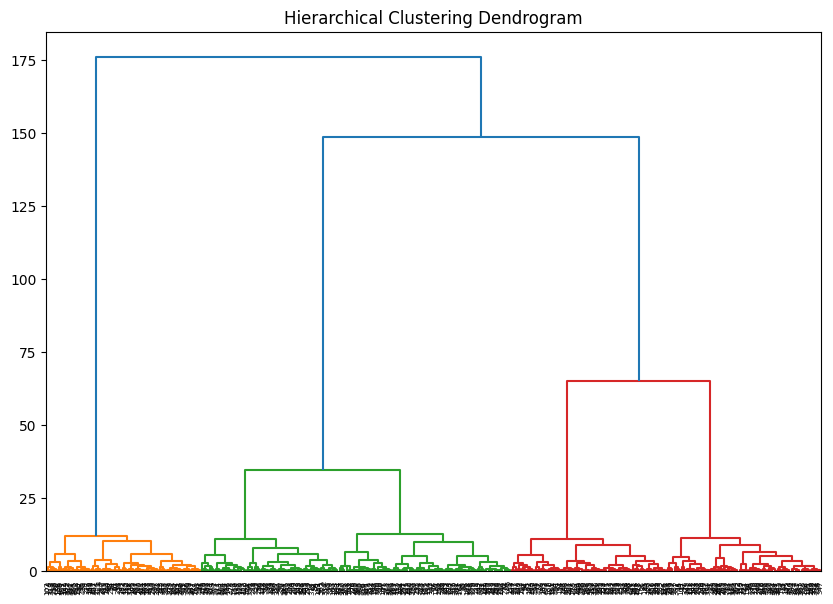

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using the 'ward' method
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


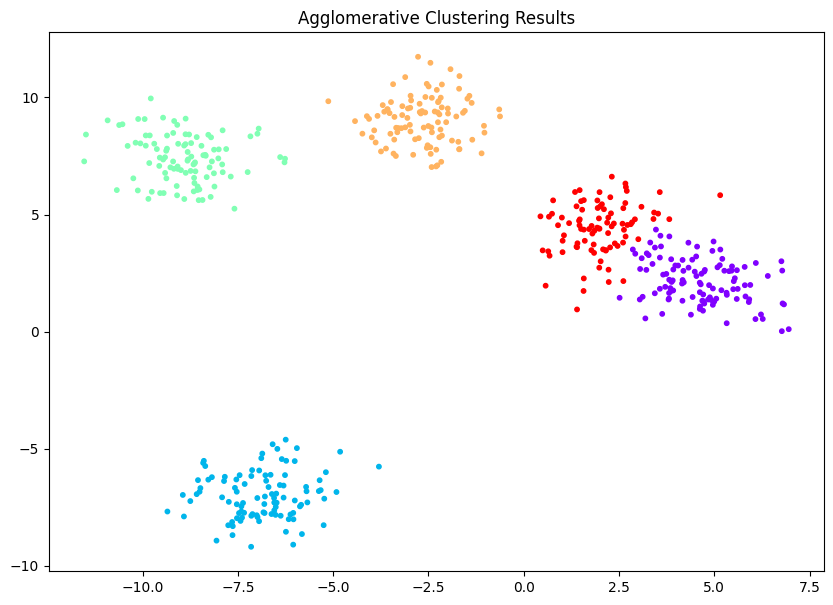

In [5]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_pred = clustering.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow', s=10)
plt.title("Agglomerative Clustering Results")
plt.show()


In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(X, y_pred)
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")


Silhouette Score: 0.6689004545481303
Calinski-Harabasz Index: 3817.0385930181033


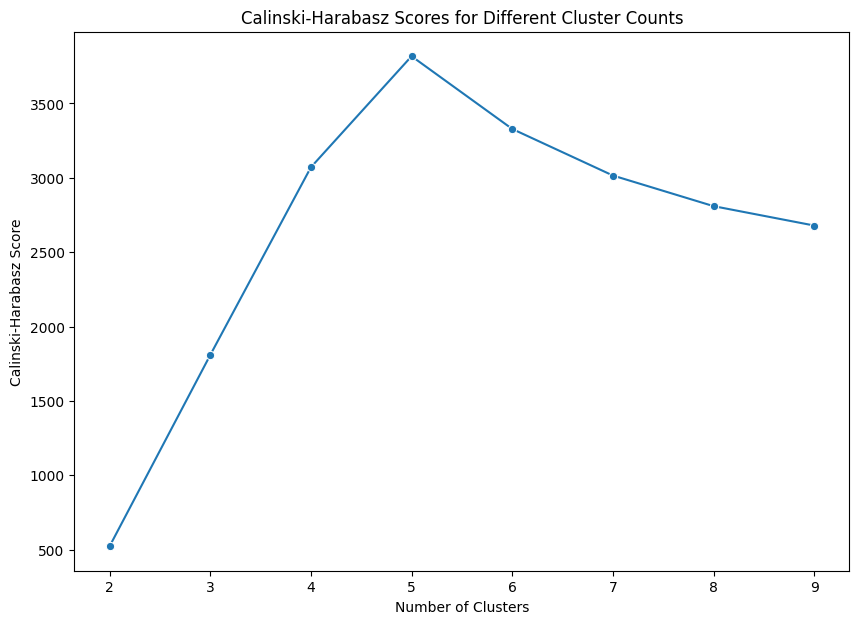

In [7]:
import seaborn as sns

# Analyzing different cluster counts
cluster_range = range(2, 10)
calinski_harabasz_scores = []

for n_clusters in cluster_range:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X)
    score = calinski_harabasz_score(X, cluster_labels)
    calinski_harabasz_scores.append(score)

# Plotting the Calinski-Harabasz scores for different cluster numbers
plt.figure(figsize=(10, 7))
sns.lineplot(x=cluster_range, y=calinski_harabasz_scores, marker='o')
plt.title("Calinski-Harabasz Scores for Different Cluster Counts")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.show()
